In [4]:
#import all the necessary packages and modules
import sys
import pandas
import numpy
import matplotlib
import seaborn
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [15]:
# Print the shape of the data - use a smaller dataset since the file is so large - 2lakh= high computation requirements
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

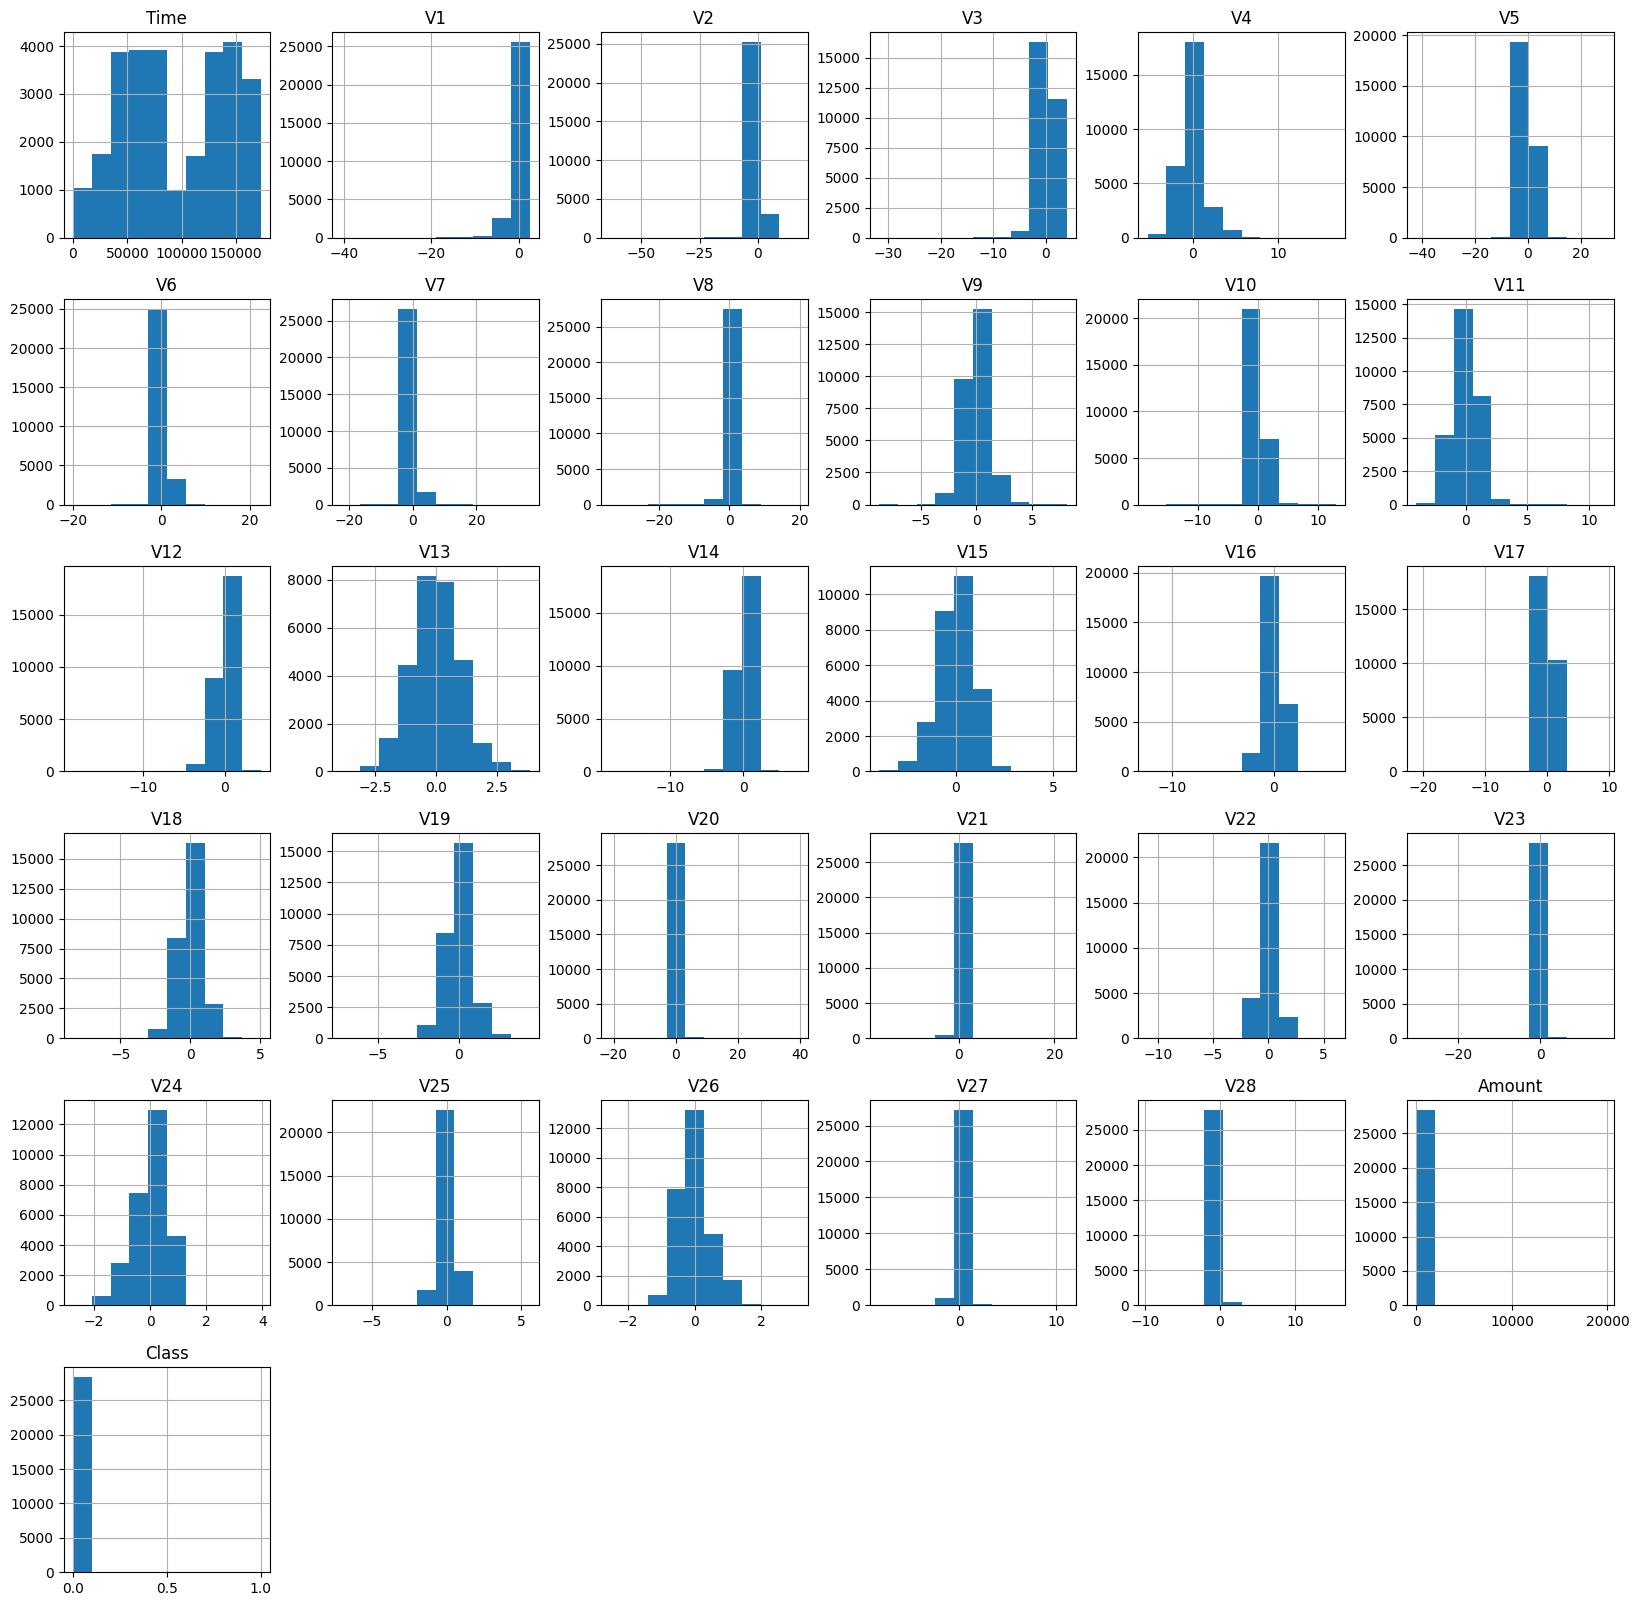

In [16]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [17]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017234102419808666
Fraud Cases: 49
Valid Transactions: 28432


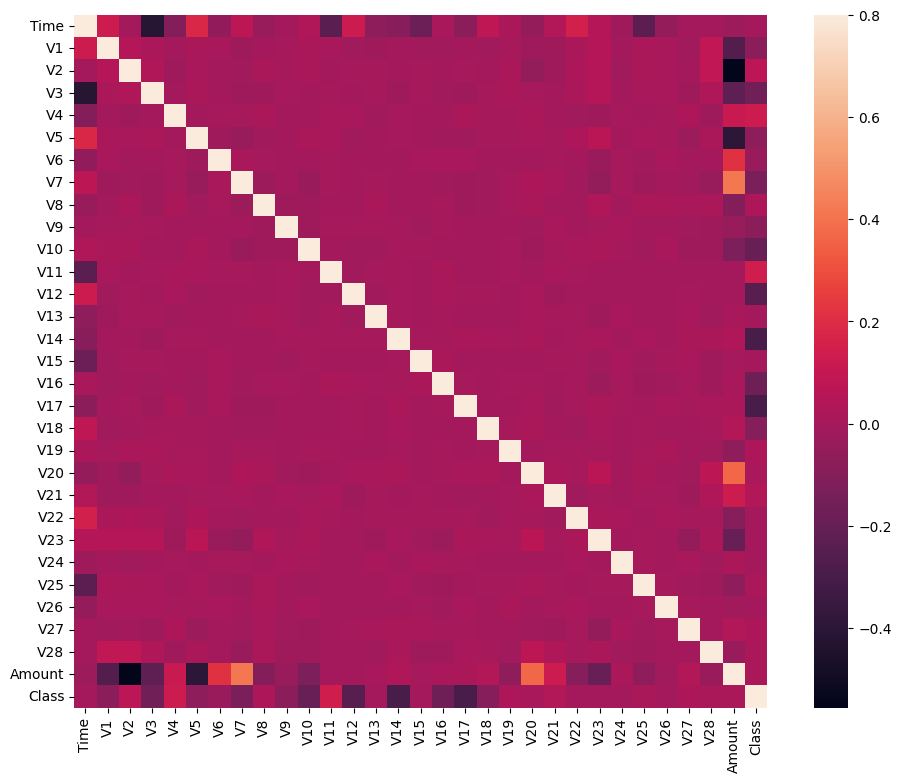

In [18]:
# Correlation matrix - used for removing unnecessary parameters and finding key patterns for overall classification
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [19]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)
